In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report



In [2]:
from google.colab import files
uploaded = files.upload()


Saving mobile_price_classification.csv to mobile_price_classification.csv


In [10]:
data = pd.read_csv('/content/mobile_price_classification.csv')

# Preview the dataset
print(data.head())


   battery_power  bluetooth  clock_speed  dual_sim  front_cam  4G  int_memory  \
0            842          0          2.2         0          1   0           7   
1           1021          1          0.5         1          0   1          53   
2            563          1          0.5         1          2   1          41   
3            615          1          2.5         0          0   0          10   
4           1821          1          1.2         0         13   1          44   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0    0.6        188        2  ...         20       756  2549     9     7   
1    0.7        136        3  ...        905      1988  2631    17     3   
2    0.9        145        5  ...       1263      1716  2603    11     2   
3    0.8        131        6  ...       1216      1786  2769    16     8   
4    0.6        141        2  ...       1208      1212  1411     8     2   

   talk_time  three_g  touch_screen  wifi  price_range  

#EDA

In [13]:
# Basic info about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [14]:
print(data.describe())

       battery_power  bluetooth  clock_speed     dual_sim    front_cam  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

                4G   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.00000

In [15]:
# Check for missing values
print(data.isnull().sum())

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64


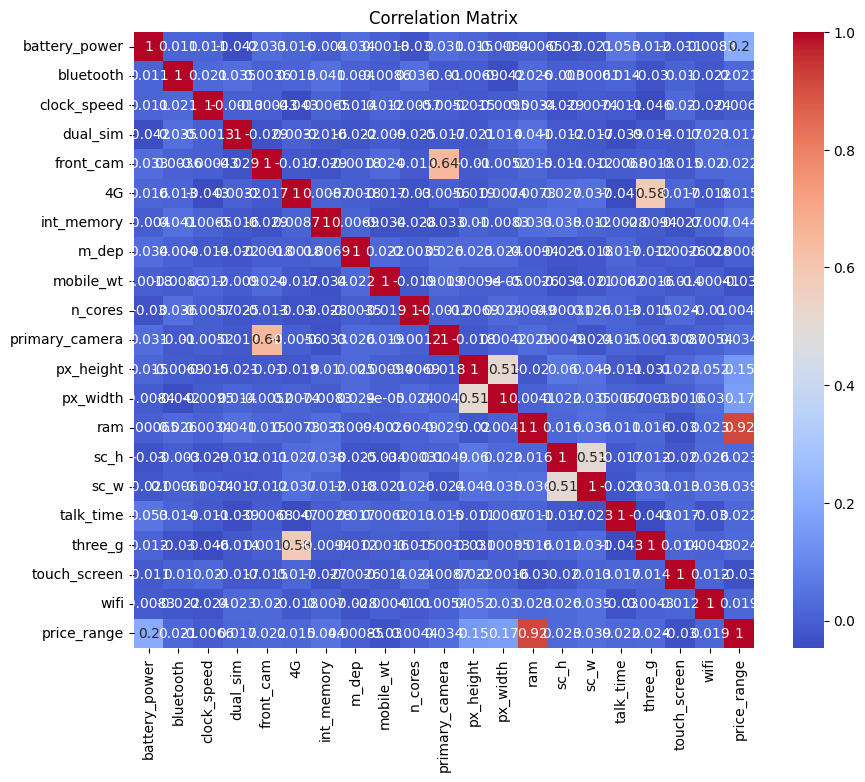

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#Preprocessing

1.   Separate features (X) and labels (y).
2.   Split the dataset into training and testing sets.
3.   Standardize the feature values using StandardScaler.





In [26]:
# Drop constant/low variance features
print("\nRemoving low variance features:")
selector = VarianceThreshold(threshold=0.01)  # Adjust threshold if needed
X = data.drop('price_range', axis=1)
X = selector.fit_transform(X)
print(f"Shape after removing low variance features: {X.shape}")



Removing low variance features:
Shape after removing low variance features: (2000, 20)



Performing feature correlation analysis:


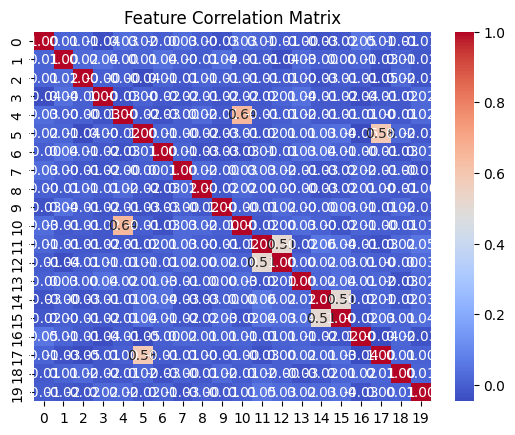

In [27]:
# Feature correlation analysis
print("\nPerforming feature correlation analysis:")
correlation_matrix = pd.DataFrame(X).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

# Optionally drop highly correlated features (e.g., correlation > 0.9)
# This example assumes 'feature_1' and 'feature_2' are highly correlated
# data.drop(['feature_1', 'feature_2'], axis=1, inplace=True)


Checking for outliers:


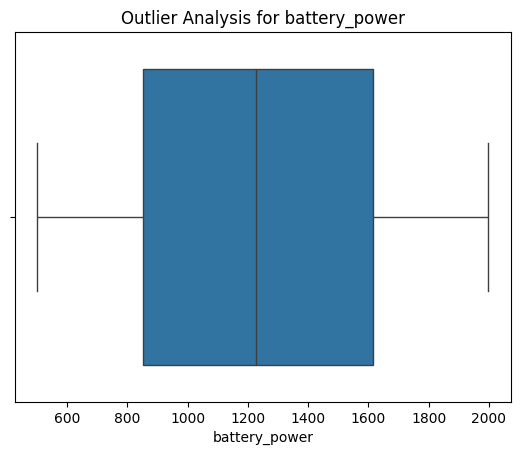

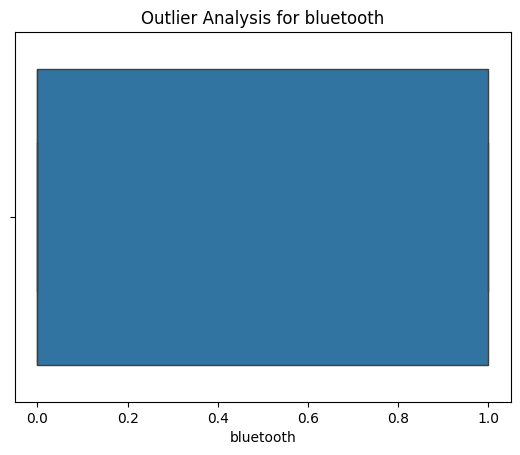

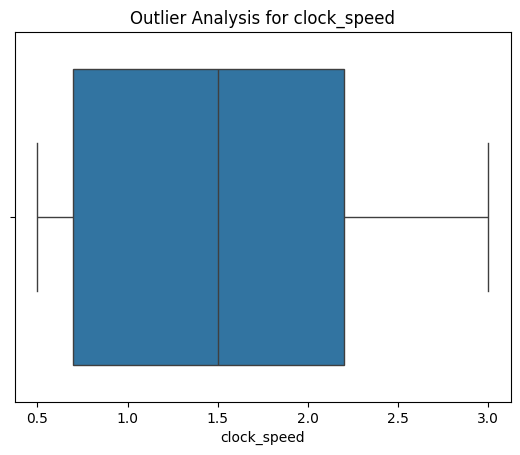

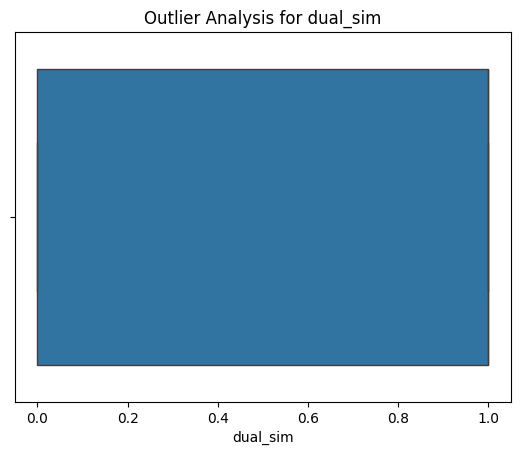

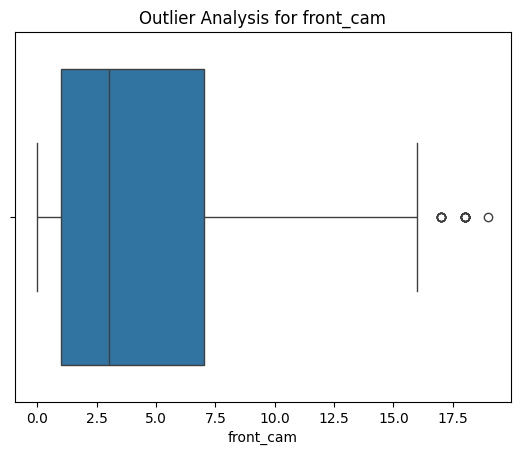

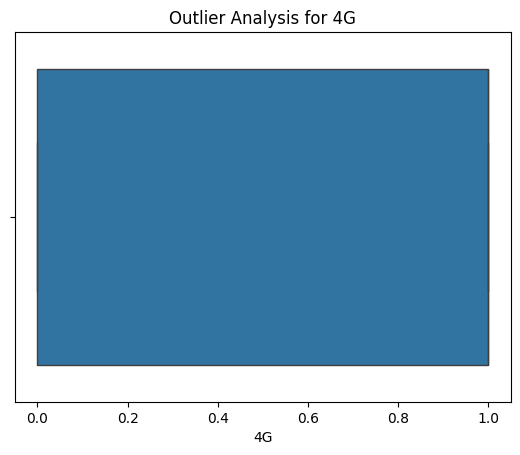

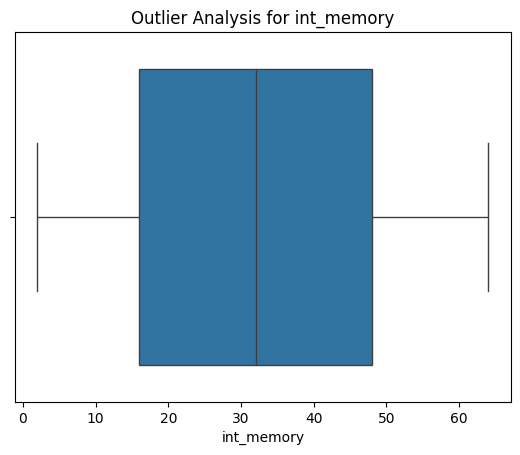

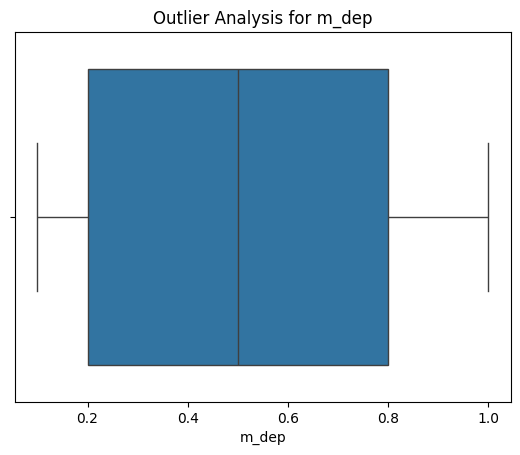

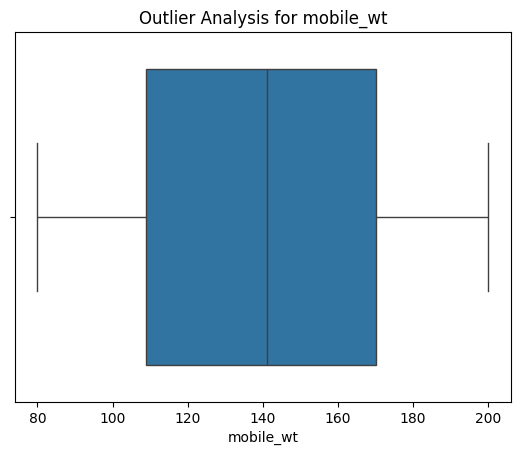

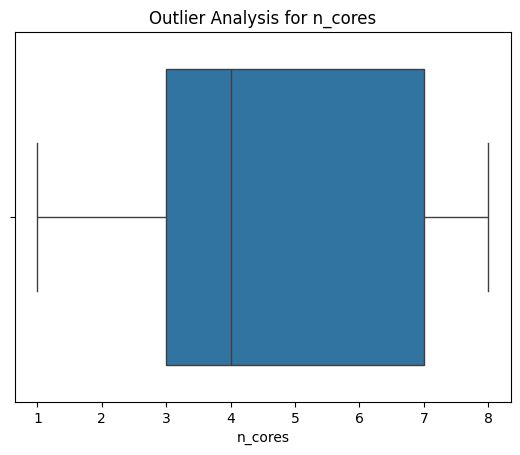

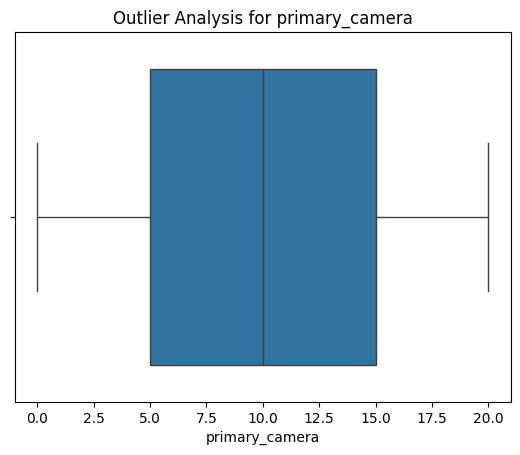

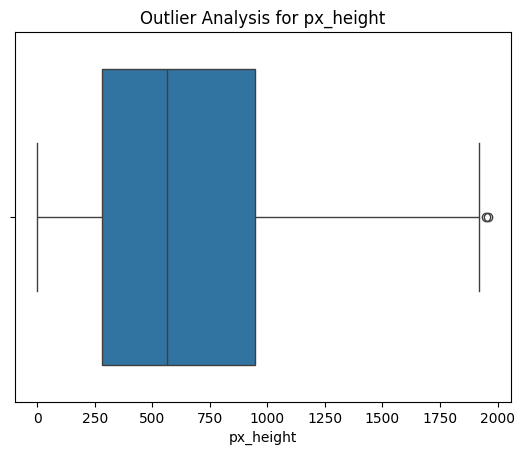

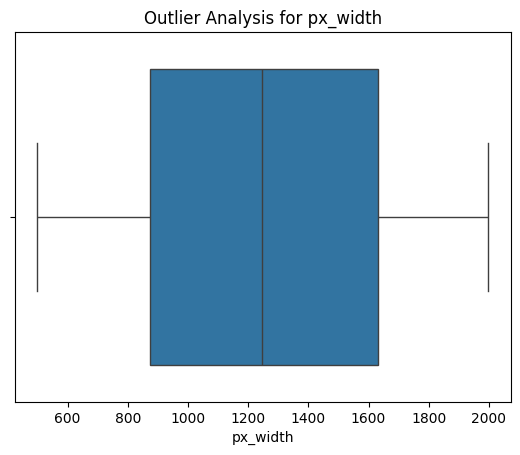

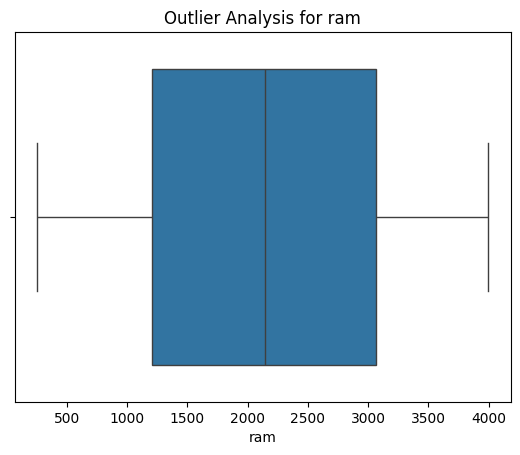

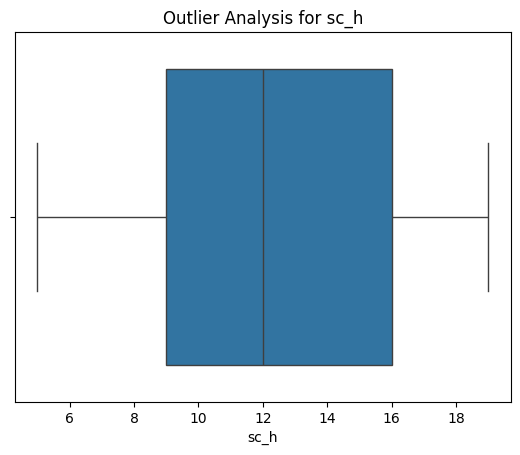

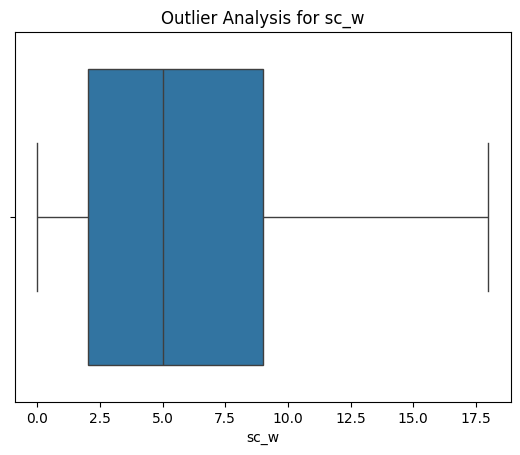

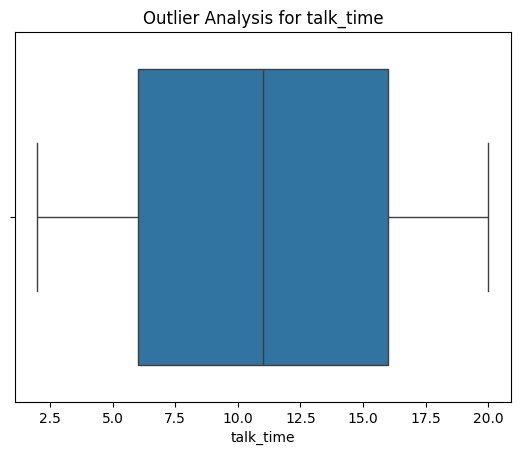

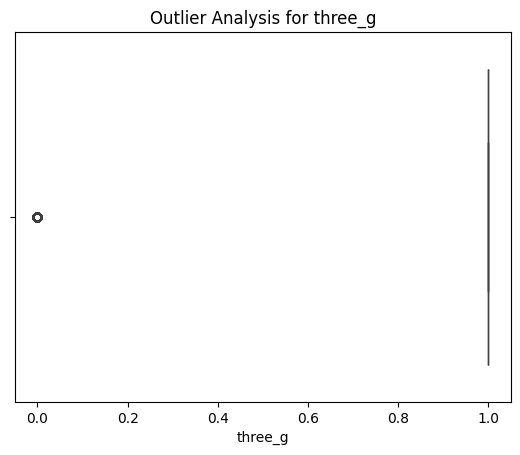

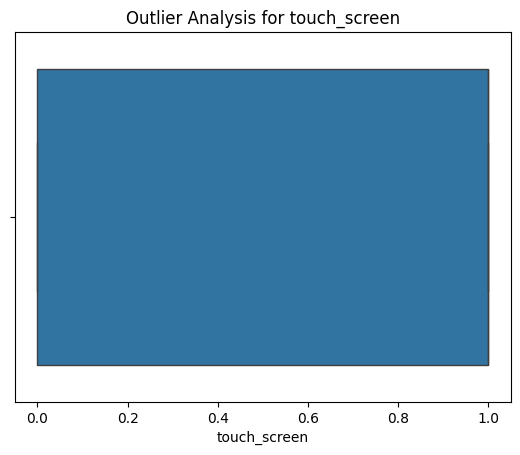

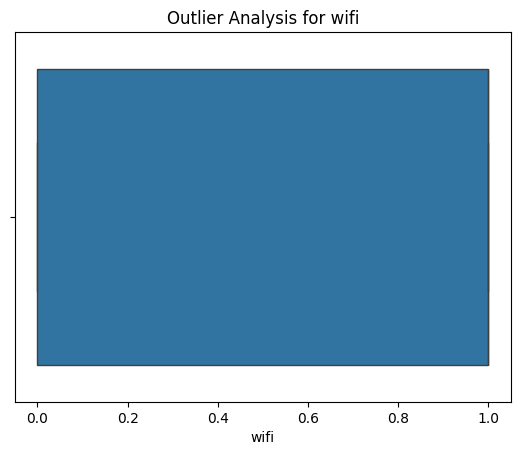

In [28]:
# Outlier handling
print("\nChecking for outliers:")
for column in data.columns:
    if data[column].dtype != 'object' and column != 'price_range':
        sns.boxplot(x=data[column])
        plt.title(f"Outlier Analysis for {column}")
        plt.show()

In [30]:
# Check for class imbalance
print("\nClass balance check:")
y = data['price_range']
print(y.value_counts())



Class balance check:
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [31]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Summary of preprocessing
print("\nPreprocessing complete!")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Preprocessing complete!
Training set shape: (1600, 20)
Test set shape: (400, 20)


#Build the Artificial Neural Network

In [18]:
# Initialize the model
model = Sequential()

# Input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Output layer (softmax for multi-class classification)
model.add(Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,020 (15.70 KB)

 Trainable params: 4,020 (15.70 KB)

 Non-trainable params: 0 (0.00 B)

#Train the Model

In [19]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2761 - loss: 1.4463 - val_accuracy: 0.3313 - val_loss: 1.3242
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4313 - loss: 1.2546 - val_accuracy: 0.4875 - val_loss: 1.1340
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5999 - loss: 1.0004 - val_accuracy: 0.6625 - val_loss: 0.8243
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7636 - loss: 0.7116 - val_accuracy: 0.7500 - val_loss: 0.5922
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8272 - loss: 0.5051 - val_accuracy: 0.8438 - val_loss: 0.4431
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8798 - loss: 0.3805 - val_accuracy: 0.8687 - val_loss: 0.3631
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9145 - loss: 0.3039 - val_accuracy: 0.8750 - val_loss: 0.3146
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9307 - loss: 0.2517 - val_accuracy: 0.8813 - val_loss:

#Hyperparameter Tuning

In [20]:
# Example of experimenting with hyperparameters
model.compile(optimizer=Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#Evaluate Model Performance

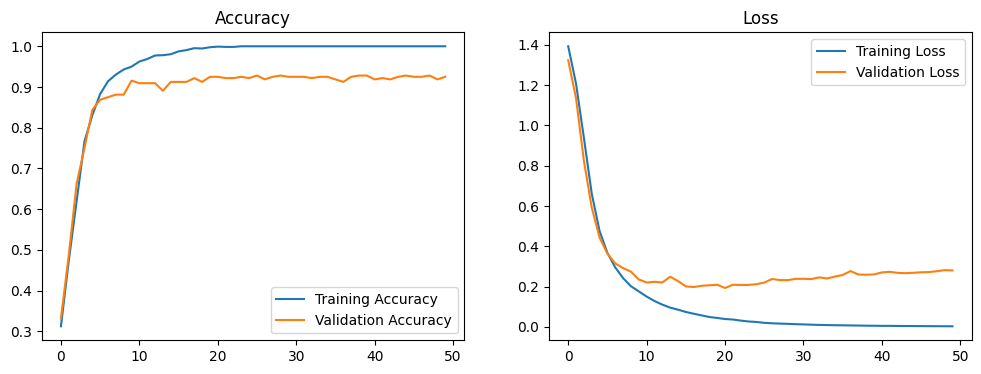

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.90      0.89      0.89       100
           2       0.88      0.90      0.89       100
           3       0.95      0.93      0.94       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [21]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss")

plt.show()

# Classification report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))


In [23]:
# Save the model
model.save('mobile_price_model.keras')

